In [1]:
import numpy as np
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
    return w[1] * t_u ** 2 + w[0] * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

def dmodel_dw1(t_u, w, b):
    return 2 * w[1] * t_u 

def dmodel_dw0(t_u, w, b):
    return t_u 

def dmodel_db(t_u, w, b):
    return 1.0


def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w, b)
    dloss_dw0 = dloss_dtp * dmodel_dw0(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw0.sum(), dloss_db.sum()])  # <1>

def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w = [1.0, 1.0]
        w[1], w[0], b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params
            
    return params
t_un = 0.1*t_u
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-5, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 1, Loss 675.794312
    Params: tensor([ 9.9441e-01,  9.9720e-01, -4.8176e-04])
    Grad:   tensor([559.3579, 279.6790,  48.1760])
Epoch 2, Loss 665.300537
    Params: tensor([ 9.8889e-01,  9.9443e-01, -9.5993e-04])
    Grad:   tensor([551.9173, 277.5110,  47.8170])
Epoch 3, Loss 655.023682
    Params: tensor([ 0.9834,  0.9917, -0.0014])
    Grad:   tensor([544.6213, 275.3708,  47.4627])
...
Epoch 10, Loss 588.706787
    Params: tensor([ 0.9472,  0.9730, -0.0047])
    Grad:   tensor([497.3018, 261.1278,  45.1044])
Epoch 11, Loss 579.975525
    Params: tensor([ 0.9423,  0.9704, -0.0051])
    Grad:   tensor([491.0387, 259.1927,  44.7839])
...
Epoch 99, Loss 193.465240
    Params: tensor([ 0.6672,  0.7981, -0.0353])
    Grad:   tensor([199.8918, 149.3460,  26.5750])
Epoch 100, Loss 191.423889
    Params: tensor([ 0.6652,  0.7966, -0.0355])
    Grad:   tensor([198.2209, 148.5412,  26.4414])
...
Epoch 4000, Loss 10.344298
    Params: tensor([ 0.3164,  0.4253, -0.1641])
    Grad:   tens

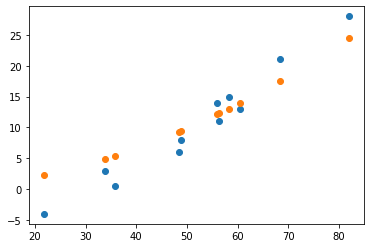

In [4]:
from matplotlib import pyplot as plt

# 파랑: 원본
plt.scatter(t_u, t_c)

w = [1.0, 1.0]
w[1], w[0], b = params
t_p = model(t_u*0.1, w, b)

# 주황: 추론값
plt.scatter(t_u, t_p)
